In [51]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper')

In [53]:
aggregated_loc = '/data/repos/zoobot/data/decals/classifications/streaming/classifications.csv'

In [54]:
df = pd.read_csv(aggregated_loc)

In [55]:
len(df)

105074

In [57]:
assert len(df) == len(df['subject_id'].unique())

In [58]:
by_upload_date = df.groupby('upload_date').agg({'subject_id': 'count'})

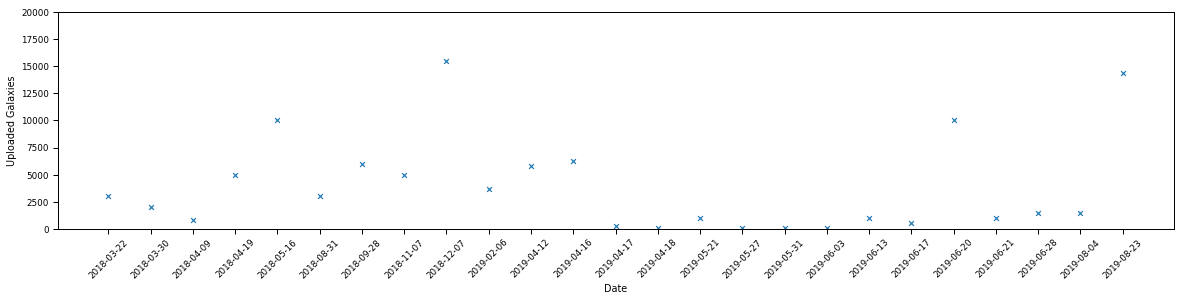

In [60]:
fig, ax = plt.subplots(figsize=(20, 4))
ax.scatter(by_upload_date.index, by_upload_date['subject_id'], marker='x')
ax.set_ylim([0, 20000])
ax.set_ylabel('Uploaded Galaxies')
ax.set_xlabel('Date')
_ = plt.xticks(rotation=45)

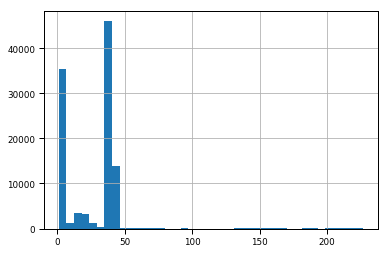

In [61]:
df['smooth-or-featured_total-votes'].hist(bins=40)

In [62]:
df_overclassified = df[df['smooth-or-featured_total-votes'] > 45]
len(df_overclassified)

182

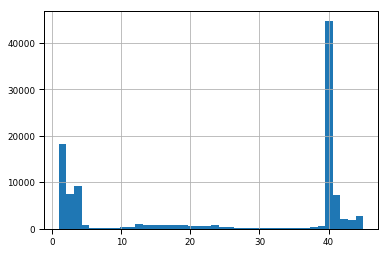

In [63]:
df = df[df['smooth-or-featured_total-votes'] <= 45]
df['smooth-or-featured_total-votes'].hist(bins=40)

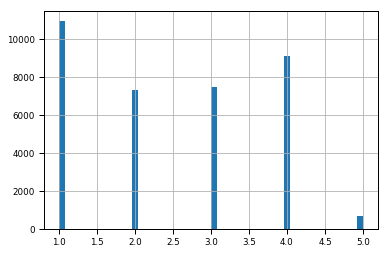

In [66]:
df[df['smooth-or-featured_total-votes'] <= 5]['smooth-or-featured_total-votes'].hist(bins=50)

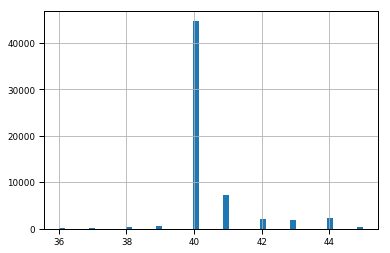

In [67]:
df[df['smooth-or-featured_total-votes'] > 35]['smooth-or-featured_total-votes'].hist(bins=50)

In [72]:
classified_by_random = len(df[df['smooth-or-featured_total-votes'] <= 5])
classified_by_random

35392

In [73]:
classified_by_priority = len(df[df['smooth-or-featured_total-votes'] > 35])
classified_by_priority

59672

In [74]:
agg = pd.read_parquet('/data/repos/zoobot/data/decals/classifications/streaming/aggregated.parquet')

In [75]:
len(agg)

105074

So in summary, about 25,000 with 2-4, 10,000 with 1, and 60,000 with 40 or more